In [304]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
import glob, os

# Google developer API key
from config import yelpkey

In [305]:
# Output File (CSV)

stl_zip_codes = "STL_zipcodesCORRECT.csv"

stl_zip_df = pd.read_csv(stl_zip_codes)
stl_zip_df.head()

,ZIP,Code,Type,County,Population,Area,Code(s),Unnamed: 7,Unnamed: 8
0,ZIP,Code,63101,Standard,Saint,Louis,City,2620,314
1,ZIP,Code,63102,Standard,Saint,Louis,City,2316,314
2,ZIP,Code,63103,Standard,Saint,Louis,City,6900,314
3,ZIP,Code,63104,Standard,Saint,Louis,City,18656,314
4,ZIP,Code,63106,Standard,Saint,Louis,City,11883,314


In [306]:
stl_zip_df.drop(['ZIP', 'Code', 'County', 'Population', 'Area', 'Code(s)', 'Unnamed: 8'], axis=1, inplace=True)
stl_zip_df.head()

,Type,Unnamed: 7
0,63101,2620
1,63102,2316
2,63103,6900
3,63104,18656
4,63106,11883


In [307]:
stl_zip_df = stl_zip_df.rename(columns={"Type": "ZIP Code", "Unnamed: 7": "Population"})
stl_zip_df.head()

,ZIP Code,Population
0,63101,2620
1,63102,2316
2,63103,6900
3,63104,18656
4,63106,11883


In [308]:
stl_zip_df.dtypes

ZIP Code      int64
Population    int64
dtype: object

In [309]:
zip_codes = stl_zip_df['ZIP Code']
#zip_codes

In [310]:
# importing crime data (CSV) and combining into 1 df

stl_crime_df = pd.concat(map(pd.read_csv, glob.glob(os.path.join("complete_file.csv"))))
stl_crime_df.head()

,Complaint,CodedMonth,DateOccur,FlagCrime,FlagUnfounded,FlagAdministrative,Count,FlagCleanup,Crime,District,...,LocationName,LocationComment,CADAddress,CADStreet,Unnamed: 18,state,street address,Zip,XCoord,YCoord
0,19-025935,2019-06,1/1/1900 0:00,Y,,,1,,51322,4,...,,,1811,WARREN,St. Louis,MO,"1811 WARREN, St. Louis, MO",63106,898905.7,1036540.0
1,19-020007,2019-05,6/18/1994 0:01,Y,,,1,,175500,1,...,,,7300,VERMONT,St. Louis,MO,"7300 VERMONT, St. Louis, MO",63101,892793.9,1076992.0
2,19-010094,2019-03,2/7/1996 13:02,Y,,,1,,263899,4,...,,@HEADQUARTERS,1915,OLIVE,St. Louis,MO,"1915 OLIVE, St. Louis, MO",63103,0.0,0.0
3,19-007109,2019-02,10/7/1996 12:43,Y,,,1,,263899,4,...,,@HEADQUARTERS,1915,OLIVE,St. Louis,MO,"1915 OLIVE, St. Louis, MO",63103,0.0,0.0
4,19-028394,2019-06,7/5/1998 12:00,Y,,,1,,115400,6,...,,,5704,ACME,St. Louis,MO,"5704 ACME, St. Louis, MO",63101,0.0,0.0


In [311]:
stl_crime_df.drop(['FlagCrime', 'FlagUnfounded', 'FlagAdministrative', 'Count', 'FlagCleanup'], axis=1, inplace=True)
#stl_crime_df.head()

In [312]:
zip_code_df = pd.DataFrame(stl_crime_df["Zip"].value_counts())
zip_code_df.head()

,Zip
63101,15623
63116,1156
63118,989
63147,859
63103,779


In [313]:
new_zip = zip_code_df.reset_index()
clean_zip = new_zip.rename(columns={"index": "ZIP Code", "Zip": "Crimes Committed"})
clean_zip.head()

,ZIP Code,Crimes Committed
0,63101,15623
1,63116,1156
2,63118,989
3,63147,859
4,63103,779


In [314]:
crime_merge = pd.merge(clean_zip, stl_zip_df, on="ZIP Code", how="outer")
crime_merge

,ZIP Code,Crimes Committed,Population
0,63101,15623.0,2620.0
1,63116,1156.0,43540.0
2,63118,989.0,26704.0
3,63147,859.0,11373.0
4,63103,779.0,6900.0
5,63111,748.0,20313.0
6,63104,666.0,18656.0
7,63107,650.0,11912.0
8,63115,638.0,20775.0
9,63112,574.0,20368.0


In [315]:
clean_zip_df = crime_merge.dropna(subset=['Crimes Committed', 'Population'])
clean_zip_df

,ZIP Code,Crimes Committed,Population
0,63101,15623.0,2620.0
1,63116,1156.0,43540.0
2,63118,989.0,26704.0
3,63147,859.0,11373.0
4,63103,779.0,6900.0
5,63111,748.0,20313.0
6,63104,666.0,18656.0
7,63107,650.0,11912.0
8,63115,638.0,20775.0
9,63112,574.0,20368.0


In [316]:
clean_zip_df.sum()

ZIP Code            1136041.0
Crimes Committed      26317.0
Population           309233.0
dtype: float64

In [317]:
lat_long = pd.read_csv("lat_long_zip.csv")
lat_long.drop(['City'], axis=1, inplace=True)
lat_long = lat_long.dropna(subset=['Latitude','Longitude','Zip'])
lat_long['Zip']=lat_long['Zip'].astype(int)
lat_long = lat_long.rename(columns={"Zip": "ZIP Code"})
lat_long

,Latitude,Longitude,geopoint,ZIP Code
0,38.631551,-90.19300,"38.631551, -90.193",63101
1,38.635200,-90.18702,"38.6352, -90.18702",63102
2,38.631451,-90.21415,"38.631451, -90.21415",63103
3,38.610701,-90.21362,"38.610701, -90.21362",63104
4,38.644451,-90.20636,"38.644451, -90.20636",63106
5,38.662800,-90.20949,"38.6628, -90.20949",63107
6,38.646201,-90.25435,"38.646201, -90.25435",63108
7,38.586052,-90.29410,"38.586052, -90.2941",63109
8,38.622601,-90.26182,"38.622601, -90.26182",63110
9,38.559302,-90.25174,"38.559302, -90.25174",63111


In [318]:
lat_long.dtypes
final_df = pd.merge(clean_zip_df,lat_long, on="ZIP Code", how="outer")
final_df

,ZIP Code,Crimes Committed,Population,Latitude,Longitude,geopoint
0,63101,15623.0,2620.0,38.631551,-90.19300,"38.631551, -90.193"
1,63116,1156.0,43540.0,38.580552,-90.26307,"38.580552, -90.26307"
2,63118,989.0,26704.0,38.594901,-90.22780,"38.594901, -90.2278"
3,63147,859.0,11373.0,38.692861,-90.21905,"38.692861, -90.21905"
4,63103,779.0,6900.0,38.631451,-90.21415,"38.631451, -90.21415"
5,63111,748.0,20313.0,38.559302,-90.25174,"38.559302, -90.25174"
6,63104,666.0,18656.0,38.610701,-90.21362,"38.610701, -90.21362"
7,63107,650.0,11912.0,38.662800,-90.20949,"38.6628, -90.20949"
8,63115,638.0,20775.0,38.676851,-90.24009,"38.676851, -90.24009"
9,63112,574.0,20368.0,38.661351,-90.28434,"38.661351, -90.28434"


In [319]:



# **************************

# Brooklyn code:
#r=requests.get("https://api.yelp.com/v3/businesses/search", headers={"content-type":"Bearer"})

url = "https://api.yelp.com/v3/businesses/search"

for page_num in [1, 2]:
    purl = "https://api.yelp.com/v3/businesses/search" + str(page_num)
    print(purl)

addresses_df = pd.read_csv("addresszip.csv")



store_names = []
loc_zip_codes =[]
stl_zip_codes =[]

zips = {
    63101,
    63102,
    63103,
    63104,
    63106,
    63107,
    63108,
    63109,
    63110,
    63111,
    63112,
    63113,
    63115,
    63116,
    63118,
    63120,
    63139,
    63147,
    
}


unique_zip_codes = addresses_df["Zip"].unique()


#for zip_code in ["63101","63102","63103","63104", "63106","63107", 
#                  "63108","63109", "63110","63111", "63112","63113",
#                  "63115","63116", "63118","63120", "63139","63147"]:

for index, row in final_df.iterrows():
#for zip_code in zip_codes:
#for zip_code in zips:
    zip_code = str(int(row['ZIP Code']))
    print(zip_code)
    params = {
        "Authorization": yelpkey,
        "latitude":    row['Latitude'],
        "longitude":    row['Longitude'],
        #"location": zip_code,
        "categories": "beer_and_wine,servicestations",
        "sort_by": "distance",
        "limit": "50",
        "radius": 5000
    }

    response = requests.get(url, params=params, headers={"Authorization": f"Bearer {yelpkey}"})
    
    data = response.json()
    print(f'input zip {zip_code} length {len(data["businesses"])}')
    
    for store in data["businesses"]:
        loc_zip = store["location"]["zip_code"]
        store_name = store["name"]
#         if loc_zip == zip_code:
        loc_zip_codes.append(loc_zip)
        store_names.append(store_name)
        stl_zip_codes.append(zip_code)
        
        
#         combined_stores.append(pd.Series([loc_data,name_data],index=["Zip Code","Store Name"]),ignore_index=True)
        
        
    
combined_stores_df = pd.DataFrame({"STL Zip Code":stl_zip_codes ,"Store Name": store_names, "Store Zip Code": loc_zip_codes})
combined_stores_df

#zip_code = "63115"

# response = requests.get(url, params=params, headers={"Authorization": f"Bearer {yelpkey}"})
# response
#unique_zip_codes

https://api.yelp.com/v3/businesses/search1
https://api.yelp.com/v3/businesses/search2
63101
input zip 63101 length 34
63116
input zip 63116 length 45
63118
input zip 63118 length 48
63147
input zip 63147 length 15
63103
input zip 63103 length 43
63111
input zip 63111 length 28
63104
input zip 63104 length 42
63107
input zip 63107 length 32
63115
input zip 63115 length 26
63112
input zip 63112 length 46
63113
input zip 63113 length 45
63110
input zip 63110 length 44
63106
input zip 63106 length 38
63108
input zip 63108 length 47
63102
input zip 63102 length 33
63120
input zip 63120 length 17
63109
input zip 63109 length 50
63139
input zip 63139 length 50


,STL Zip Code,Store Name,Store Zip Code
0,63101,Yoshi,63101
1,63101,Shell,63101
2,63101,James Henry Provisions,63102
3,63101,Crown Mart 7 Inc,63106
4,63101,Kilroy's,63102
5,63101,Overturf Bp Amoco,63102
6,63101,BP,63103
7,63101,Grand Petite Market,63103
8,63101,BP,63103
9,63101,Midwest Petroleum,63103


In [320]:
zip_count_df = combined_stores_df.groupby(['STL Zip Code']).size().reset_index(name='counts')
zip_count_df = zip_count_df.rename(columns={"STL Zip Code": "ZIP Code", "counts": "Liquor Stores"})
zip_count_df

,ZIP Code,Liquor Stores
0,63101,34
1,63102,33
2,63103,43
3,63104,42
4,63106,38
5,63107,32
6,63108,47
7,63109,50
8,63110,44
9,63111,28


In [321]:
data = response.json()
pprint(data)

{'businesses': [{'alias': 'hampton-express-saint-louis',
                 'categories': [{'alias': 'servicestations',
                                 'title': 'Gas Stations'},
                                {'alias': 'convenience',
                                 'title': 'Convenience Stores'}],
                 'coordinates': {'latitude': 38.609989,
                                 'longitude': -90.288498},
                 'display_phone': '',
                 'distance': 299.0010063961226,
                 'id': 'RAGxjLd21aGJHTnjiz3m3A',
                 'image_url': '',
                 'is_closed': False,
                 'location': {'address1': '2724 Watson Rd',
                              'address2': '',
                              'address3': '',
                              'city': 'Saint Louis',
                              'country': 'US',
                              'display_address': ['2724 Watson Rd',
                                                  'Saint Lo

                 'distance': 2679.830429584782,
                 'id': '-0A78nLURx8zQmlZxad0lg',
                 'image_url': 'https://s3-media1.fl.yelpcdn.com/bphoto/n4VQBofe0cAjhLU9yq_D5g/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '2664 S Big Bend Blvd',
                              'address2': None,
                              'address3': None,
                              'city': 'Maplewood',
                              'country': 'US',
                              'display_address': ['2664 S Big Bend Blvd',
                                                  'Maplewood, MO 63143'],
                              'state': 'MO',
                              'zip_code': '63143'},
                 'name': 'D Mart',
                 'phone': '+13146440497',
                 'rating': 5.0,
                 'review_count': 1,
                 'transactions': [],
                 'url': 'https://www.yelp.com/biz/d-mart-maplewood?adjust_cre

                 'coordinates': {'latitude': 38.57385, 'longitude': -90.29516},
                 'display_phone': '(314) 752-1089',
                 'distance': 4120.468323824934,
                 'id': '2clHJwhk3n7H7VDA2Hp2xQ',
                 'image_url': 'https://s3-media4.fl.yelpcdn.com/bphoto/_Pfff1Hk4CDGLY4uveWE0A/o.jpg',
                 'is_closed': False,
                 'location': {'address1': '6901 Hampton Ave',
                              'address2': '',
                              'address3': '',
                              'city': 'Saint Louis',
                              'country': 'US',
                              'display_address': ['6901 Hampton Ave',
                                                  'Saint Louis, MO 63109'],
                              'state': 'MO',
                              'zip_code': '63109'},
                 'name': 'Gas Mart',
                 'phone': '+13147521089',
                 'rating': 3.0,
                 'review

In [322]:
for store in data["businesses"]:
    
    print(store["location"]["zip_code"])

63139
63139
63139
63143
63139
63143
63139
63139
63143
63110
63139
63139
63143
63109
63139
63139
63110
63139
63143
63143
63143
63117
63105
63143
63143
63116
63109
63110
63117
63117
63117
63117
63110
63117
63143
63143
63119
63119
63116
63116
63144
63109
63108
63108
63108
63116
63108
63105
63116
63105


In [323]:
zip_count_df.dtypes

ZIP Code         object
Liquor Stores     int64
dtype: object

In [324]:
clean_zip_df.dtypes

ZIP Code              int64
Crimes Committed    float64
Population          float64
dtype: object

In [325]:
zip_count_df['ZIP Code'] = zip_count_df['ZIP Code'].astype(int)
zip_count_df.dtypes

ZIP Code         int32
Liquor Stores    int64
dtype: object

In [326]:
zip_final_df = pd.merge(zip_count_df, clean_zip_df, on="ZIP Code", how="outer")
zip_final_df

,ZIP Code,Liquor Stores,Crimes Committed,Population
0,63101,34,15623.0,2620.0
1,63102,33,468.0,2316.0
2,63103,43,779.0,6900.0
3,63104,42,666.0,18656.0
4,63106,38,521.0,11883.0
5,63107,32,650.0,11912.0
6,63108,47,489.0,21568.0
7,63109,50,357.0,26946.0
8,63110,44,524.0,17107.0
9,63111,28,748.0,20313.0


In [327]:
zip_final_df['Crimes per Person'] = zip_final_df['Crimes Committed'] / zip_final_df['Population']
zip_final_df['Crimes per Liquor Store'] = zip_final_df['Crimes Committed'] / zip_final_df['Liquor Stores']
zip_final_df

,ZIP Code,Liquor Stores,Crimes Committed,Population,Crimes per Person,Crimes per Liquor Store
0,63101,34,15623.0,2620.0,5.962977,459.500000
1,63102,33,468.0,2316.0,0.202073,14.181818
2,63103,43,779.0,6900.0,0.112899,18.116279
3,63104,42,666.0,18656.0,0.035699,15.857143
4,63106,38,521.0,11883.0,0.043844,13.710526
5,63107,32,650.0,11912.0,0.054567,20.312500
6,63108,47,489.0,21568.0,0.022672,10.404255
7,63109,50,357.0,26946.0,0.013249,7.140000
8,63110,44,524.0,17107.0,0.030631,11.909091
9,63111,28,748.0,20313.0,0.036824,26.714286


In [328]:
### playing with ANOVA testing

liquor_stores = zip_final_df['Liquor Stores'].sum()
sum_crimes_person = zip_final_df['Crimes per Person'].sum()
ave_crimes_person = (zip_final_df['Crimes Committed'].sum()) / (zip_final_df['Population'].sum())
ave_crimes_person_mean = sum_crimes_person / 18
ave_pop = (zip_final_df['Population'].sum())/18
crimes_mean = zip_final_df['Crimes Committed'].mean()
crimes_median = zip_final_df['Crimes Committed'].median()
crime_sum = crime_mean = zip_final_df['Crimes Committed'].sum()
              
zip_final_df['Crimes Chi Squared'] = crime_sum * (((zip_final_df['Crimes Committed']-crimes_mean) * (zip_final_df['Crimes Committed']-crimes_mean)/crimes_mean))
zip_final_df['Crimes PP Chi Squared'] = sum_crimes_person * (((zip_final_df['Crimes per Person']-ave_crimes_person) * (zip_final_df['Crimes per Person']-ave_crimes_person)/ave_crimes_person))
zip_final_df

,ZIP Code,Liquor Stores,Crimes Committed,Population,Crimes per Person,Crimes per Liquor Store,Crimes Chi Squared,Crimes PP Chi Squared
0,63101,34,15623.0,2620.0,5.962977,459.500000,3.609582e+09,2764.528540
1,63102,33,468.0,2316.0,0.202073,14.181818,1.778664e+07,1.094758
2,63103,43,779.0,6900.0,0.112899,18.116279,8.398168e+06,0.061815
3,63104,42,666.0,18656.0,0.035699,15.857143,1.140668e+07,0.195310
4,63106,38,521.0,11883.0,0.043844,13.710526,1.594054e+07,0.136219
5,63107,32,650.0,11912.0,0.054567,20.312500,1.186982e+07,0.074618
6,63108,47,489.0,21568.0,0.022672,10.404255,1.704307e+07,0.311882
7,63109,50,357.0,26946.0,0.013249,7.140000,2.198066e+07,0.413142
8,63110,44,524.0,17107.0,0.030631,11.909091,1.583907e+07,0.237437
9,63111,28,748.0,20313.0,0.036824,26.714286,9.177756e+06,0.186519


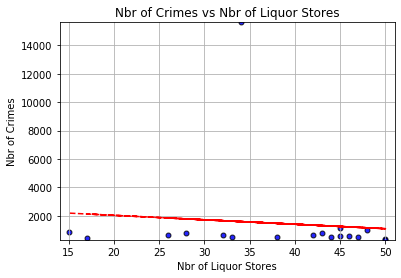

In [329]:
# Scatter Plot
x_axis = zip_final_df['Liquor Stores']
y_axis = zip_final_df['Crimes Committed']
min_stores = zip_final_df['Liquor Stores'].min()
max_stores = zip_final_df['Liquor Stores'].max()
min_crimes = zip_final_df['Crimes Committed'].min()
max_crimes = zip_final_df['Crimes Committed'].max()

#print(x_axis)
#print(y_axis)
#print(min_stores)
#print(max_stores)
#print(min_crimes)
#print(max_crimes)

plt.scatter(x_axis, y_axis, marker="o", facecolor="blue", 
            edgecolor="black", alpha=0.85, s=24)
plt.grid()
plt.title("Nbr of Crimes vs Nbr of Liquor Stores")
x_label = "Nbr of Liquor Stores"
y_label = "Nbr of Crimes"
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(min_stores-1, max_stores+1)
plt.ylim(min_crimes-1, max_crimes+1)

###

#Trendline in matplotlib
z = np.polyfit(x_axis, y_axis, 1)
p = np.poly1d(z)
plt.plot(x_axis,p(x_axis),"r--")


###

# Save Figure
plt.savefig("Crime_Liquor_Plot")

# Show plot - example
plt.show()

In [330]:
# a method to calculate r2

from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_axis, p(x_axis))
coefficient_of_dermination

0.00924867351126879

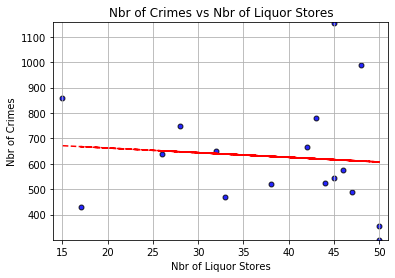

In [331]:
zip_final_filter_df = zip_final_df
zip_final_filter_df = zip_final_filter_df[zip_final_filter_df['Crimes Committed']<=2000]

# Scatter Plot Crimes vs Liquor Stores Filtered
x_axis = zip_final_filter_df['Liquor Stores']
y_axis = zip_final_filter_df['Crimes Committed']
min_stores = zip_final_filter_df['Liquor Stores'].min()
max_stores = zip_final_filter_df['Liquor Stores'].max()
min_crimes = zip_final_filter_df['Crimes Committed'].min()
max_crimes = zip_final_filter_df['Crimes Committed'].max()

#print(x_axis)
#print(y_axis)
#print(min_stores)
#print(max_stores)
#print(min_crimes)
#print(max_crimes)

plt.scatter(x_axis, y_axis, marker="o", facecolor="blue", 
            edgecolor="black", alpha=0.85, s=24)
plt.grid()
plt.title("Nbr of Crimes vs Nbr of Liquor Stores")
x_label = "Nbr of Liquor Stores"
y_label = "Nbr of Crimes"
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(min_stores-1, max_stores+1)
plt.ylim(min_crimes-1, max_crimes+1)

###

#Trendline in matplotlib
z = np.polyfit(x_axis, y_axis, 1)
p = np.poly1d(z)
plt.plot(x_axis,p(x_axis),"r--")


###

# Save Figure
plt.savefig("Crime_Liquor_Filter_Plot")

# Show plot - example
plt.show()

In [332]:
# a method to calculate r2

coefficient_of_dermination = r2_score(y_axis, p(x_axis))
coefficient_of_dermination

0.008320996825451399

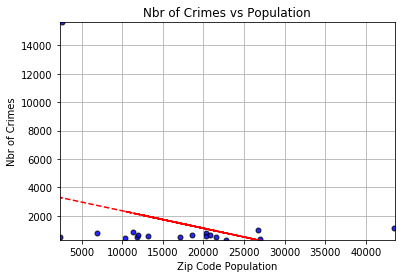

In [333]:
# Scatter Plot Crimes vs All Population
x_axis = zip_final_df['Population']
y_axis = zip_final_df['Crimes Committed']
min_pop = zip_final_df['Population'].min()
max_pop = zip_final_df['Population'].max()
min_crimes = zip_final_df['Crimes Committed'].min()
max_crimes = zip_final_df['Crimes Committed'].max()

#print(x_axis)
#print(y_axis)
#print(min_stores)
#print(max_stores)
#print(min_crimes)
#print(max_crimes)

plt.scatter(x_axis, y_axis, marker="o", facecolor="blue", 
            edgecolor="black", alpha=0.85, s=24)
plt.grid()
plt.title("Nbr of Crimes vs Population")
x_label = "Zip Code Population"
y_label = "Nbr of Crimes"
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(min_pop-1, max_pop+1)
plt.ylim(min_crimes-1, max_crimes+1)

###

#Trendline in matplotlib
z = np.polyfit(x_axis, y_axis, 1)
p = np.poly1d(z)
plt.plot(x_axis,p(x_axis),"r--")


###

# Save Figure
plt.savefig("Crime_Pop_Plot")

# Show plot - example
plt.show()

In [334]:
# a method to calculate r2

coefficient_of_dermination = r2_score(y_axis, p(x_axis))
coefficient_of_dermination

0.11786995705701675

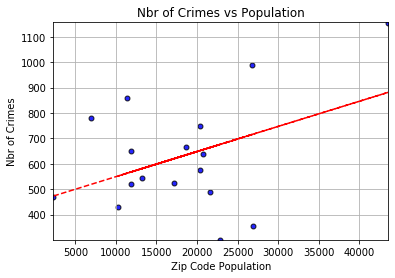

In [335]:
# Scatter Plot Crimes vs Filtered Population
x_axis = zip_final_filter_df['Population']
y_axis = zip_final_filter_df['Crimes Committed']
min_pop = zip_final_filter_df['Population'].min()
max_pop = zip_final_filter_df['Population'].max()
min_crimes = zip_final_filter_df['Crimes Committed'].min()
max_crimes = zip_final_filter_df['Crimes Committed'].max()

#print(x_axis)
#print(y_axis)
#print(min_stores)
#print(max_stores)
#print(min_crimes)
#print(max_crimes)

plt.scatter(x_axis, y_axis, marker="o", facecolor="blue", 
            edgecolor="black", alpha=0.85, s=24)
plt.grid()
plt.title("Nbr of Crimes vs Population")
x_label = "Zip Code Population"
y_label = "Nbr of Crimes"
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(min_pop-1, max_pop+1)
plt.ylim(min_crimes-1, max_crimes+1)

###

#Trendline in matplotlib
z = np.polyfit(x_axis, y_axis, 1)
p = np.poly1d(z)
plt.plot(x_axis,p(x_axis),"r--")


###

# Save Figure
plt.savefig("Crime_Pop_Filter_Plot")

# Show plot - example
plt.show()

In [336]:
# a method to calculate r2

coefficient_of_dermination = r2_score(y_axis, p(x_axis))
coefficient_of_dermination

0.17616261954463475

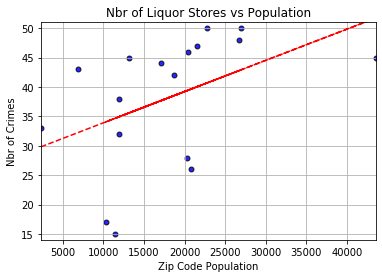

In [337]:
# Scatter Plot Liquor Stores vs Population
x_axis = zip_final_filter_df['Population']
y_axis = zip_final_filter_df['Liquor Stores']
min_pop = zip_final_filter_df['Population'].min()
max_pop = zip_final_filter_df['Population'].max()
min_crimes = zip_final_filter_df['Liquor Stores'].min()
max_crimes = zip_final_filter_df['Liquor Stores'].max()

#print(x_axis)
#print(y_axis)
#print(min_stores)
#print(max_stores)
#print(min_crimes)
#print(max_crimes)

plt.scatter(x_axis, y_axis, marker="o", facecolor="blue", 
            edgecolor="black", alpha=0.85, s=24)
plt.grid()
plt.title("Nbr of Liquor Stores vs Population")
x_label = "Zip Code Population"
y_label = "Nbr of Crimes"
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim(min_pop-1, max_pop+1)
plt.ylim(min_crimes-1, max_crimes+1)

###

#Trendline in matplotlib
z = np.polyfit(x_axis, y_axis, 1)
p = np.poly1d(z)
plt.plot(x_axis,p(x_axis),"r--")


###

# Save Figure
plt.savefig("Store_Pop_Plot")

# Show plot - example
plt.show()

In [338]:
# a method to calculate r2

coefficient_of_dermination = r2_score(y_axis, p(x_axis))
coefficient_of_dermination

0.20438987170645162

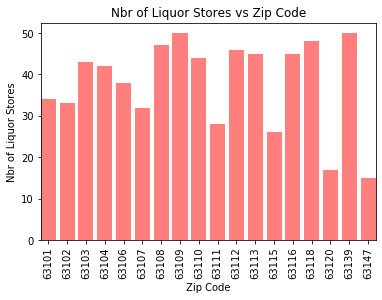

In [339]:
# bar chart Liquor Stores vs Zip
zip_codes = "63101","63102","63103","63104","63106","63107","63108","63109","63110","63111","63112","63113","63115","63116","63118","63120","63139","63147"
x_axis = np.arange(len(zip_codes))
y_axis = zip_final_df['Liquor Stores']


plt.title("Nbr of Liquor Stores vs Zip Code")
x_label = "Zip Code"
y_label = "Nbr of Liquor Stores"
plt.xlabel(x_label)
plt.ylabel(y_label)

#plt.figure(figsize=(20,10))
plt.bar(zip_codes, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='x', tight=True)

# Save Figure
plt.savefig("Zip_Stores_Plot")

# Show plot - example
plt.show()

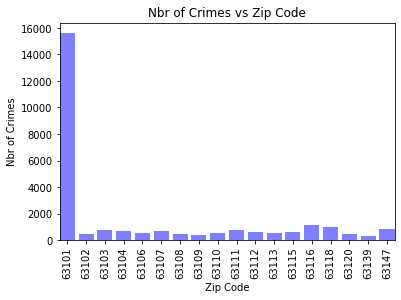

In [340]:
# bar chart Crimes vs Zip
zip_codes = "63101","63102","63103","63104","63106","63107","63108","63109","63110","63111","63112","63113","63115","63116","63118","63120","63139","63147"
x_axis = np.arange(len(zip_codes))
y_axis = zip_final_df['Crimes Committed']


plt.title("Nbr of Crimes vs Zip Code")
x_label = "Zip Code"
y_label = "Nbr of Crimes"
plt.xlabel(x_label)
plt.ylabel(y_label)

#plt.figure(figsize=(20,10))
plt.bar(zip_codes, y_axis, color='b', alpha=0.5, align="center")
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='x', tight=True)

# Save Figure
plt.savefig("Zip_Crime_Plot")

# Show plot - example
plt.show()